# Vnitřní statické účinky

Analyzujte průběh tahových/tlakových a střihových sil a ohybového momentu tenkého nosníku prostě podepřeného a zatíženého osamělými silami. Síla $F_1=500$ N je pod sklonem $\alpha=45°$, síla $F_2=250$ N. Vzdálenosti jsou: $a=0.2$ m, $b=0.65$ m a $c=0.4$ m.

<p align="center">
<img src="obrazky/prednaska07/priklad01_zadani.png" width=400/>
</p>

**Určete:**
* a) Průběhy $N$, $Q$ a $M$ podél nosníku
* b) Maximální a minimální hodnoty hodnoty

## Řešení

Nejprve uvolníme nosník, zavedeme reakce a určíme PSV.

<p align="center">
    <img src="obrazky/prednaska07/priklad01_uvolneni.png" width=400/>
</p>

PSV = 0, protože máme **3** reakce a **3** rovnice rovnováhy (ve 2D), které jsou:

$$
\begin{align}
\overrightarrow{x}:& R_{Ax} - F_1\cos(\alpha)=0  \\
y\uparrow:& R_{Ay} + R_{By} - F_2 - F_1\sin(\alpha)=0  \\
\overset{\curvearrowleft}{+M}: & R_{By}(a+b+c)-F_2(a+b) - F_1\sin(\alpha)a=0
\end{align}
$$

In [1]:
import sympy as sp
F1, F2, a, b, c, alpha = sp.symbols('F1 F2 a b c alpha')
RAx, RAy, RBy = sp.symbols('RAx RAy RBy')

In [2]:
eq1 = sp.Eq(RAx - F1*sp.cos(alpha), 0)
eq2 = sp.Eq(RAy + RBy - F2 - F1 * sp.sin(alpha), 0)
eq3 = sp.Eq(RBy * (a + b + c) - F2 * (a + b) - F1*sp.sin(alpha)*a, 0)

In [3]:
reseni = sp.solve([eq1, eq2, eq3], [RAx, RAy, RBy])
RAx = reseni[RAx]
RAy = reseni[RAy]
RBy = reseni[RBy]

In [4]:
RAx

F1*cos(alpha)

In [5]:
RAy

(F1*b*sin(alpha) + F1*c*sin(alpha) + F2*c)/(a + b + c)

In [6]:
RBy

(F1*a*sin(alpha) + F2*a + F2*b)/(a + b + c)

### Řez č.1: $x\in <0, a>$

<p align="center">
    <img src="obrazky/prednaska07/priklad01_rez1.png" width=120/>
</p>

$$
\begin{align}
\overrightarrow{x}:& N_1 + R_{Ax}=0 \\
y\uparrow:& -Q_1 + R_{Ay}=0 \\
\overset{\curvearrowleft}{+M}: & M_1 - xR_{Ay}=0
\end{align}
$$

In [7]:
N1, Q1, M1, x = sp.symbols('N1 Q1 M1 x')
eq4 = sp.Eq(N1 + RAx, 0)
eq5 = sp.Eq(-Q1 + RAy, 0)
eq6 = sp.Eq(M1 - x * RAy,0)

In [8]:
reseni = sp.solve([eq4, eq5, eq6], [N1, Q1, M1])
N1 = reseni[N1]
Q1 = reseni[Q1]
M1 = reseni[M1]

In [9]:
N1

-F1*cos(alpha)

In [10]:
Q1

(F1*b*sin(alpha) + F1*c*sin(alpha) + F2*c)/(a + b + c)

In [11]:
M1

x*(F1*b*sin(alpha) + F1*c*sin(alpha) + F2*c)/(a + b + c)

### Řez č.2: $x\in <a, a+b>$

<p align="center">
    <img src="obrazky/prednaska07/priklad01_rez2.png" width=200/>
</p>

\begin{align}
\overrightarrow{x}:& N_2 + R_{Ax}-F_1\cos(\alpha)=0 \\
y\uparrow:& R_{Ay}-Q_2-F_1\sin(\alpha)=0 \\
\overset{\curvearrowleft}{+M}: & M_2 - x R_{Ay} + (x-a)F_1 \sin(\alpha)=0
\end{align}

In [12]:
N2, Q2, M2 = sp.symbols('N2 Q2 M2')
eq7 = sp.Eq(N2 + RAx - F1 * sp.cos(alpha), 0)
eq8 = sp.Eq(RAy - Q2 -F1 * sp.sin(alpha), 0)
eq9 = sp.Eq(M2 - x * RAy + (x - a) * F1 * sp.sin(alpha),0)

In [13]:
reseni = sp.solve([eq7, eq8, eq9], [N2, Q2, M2])
N2 = reseni[N2]
Q2 = reseni[Q2]
M2 = reseni[M2]

In [14]:
N2

0

In [15]:
Q2

(-F1*a*sin(alpha) + F2*c)/(a + b + c)

In [16]:
M2

(F1*a**2*sin(alpha) + F1*a*b*sin(alpha) + F1*a*c*sin(alpha) - F1*a*x*sin(alpha) + F2*c*x)/(a + b + c)

### Řez č.3: $x\in <a+b, a+b+c>$

<p align="center">
    <img src="obrazky/prednaska07/priklad01_rez3.png" width=330/>
</p>

\begin{align}
\overrightarrow{x}:& N_3 + R_{Ax}-F_1\cos(\alpha)=0 \\
y\uparrow:& R_{Ay}-Q_3-F_1\sin(\alpha) - F_2=0 \\
\overset{\curvearrowleft}{+M}: & M_3 - x R_{Ay} + (x-a)F_1 \sin(\alpha) + (x-a-b)F_2=0
\end{align}

In [17]:
N3, Q3, M3 = sp.symbols('N3 Q3 M3')
eq10 = sp.Eq(N3 + RAx - F1 * sp.cos(alpha), 0)
eq11 = sp.Eq(RAy - Q3 - F1 * sp.sin(alpha) - F2, 0)
eq12 = sp.Eq(M3 - x * RAy + (x - a) * F1 * sp.sin(alpha) + (x-a-b) * F2,0)

In [18]:
reseni = sp.solve([eq10, eq11, eq12], [N3, Q3, M3])
N3 = reseni[N3]
Q3 = reseni[Q3]
M3 = reseni[M3]

In [19]:
N3

0

In [20]:
Q3

-(F1*a*sin(alpha) + F2*a + F2*b)/(a + b + c)

In [21]:
M3

(F1*a**2*sin(alpha) + F1*a*b*sin(alpha) + F1*a*c*sin(alpha) - F1*a*x*sin(alpha) + F2*a**2 + 2*F2*a*b + F2*a*c - F2*a*x + F2*b**2 + F2*b*c - F2*b*x)/(a + b + c)

## Analýza výsledků

In [22]:
# nahrajeme knihovnu na kresleni grafu a nastavime ji
import matplotlib.pylab as plt
plt.xkcd()
# nahrajeme numerickou knihovnu
import numpy as np
F1num = 500.
F2num = 250.
alphanum = sp.rad(45.)
anum, bnum, cnum = 0.2, 0.65, 0.4

### Průběh posouvající síly $N$

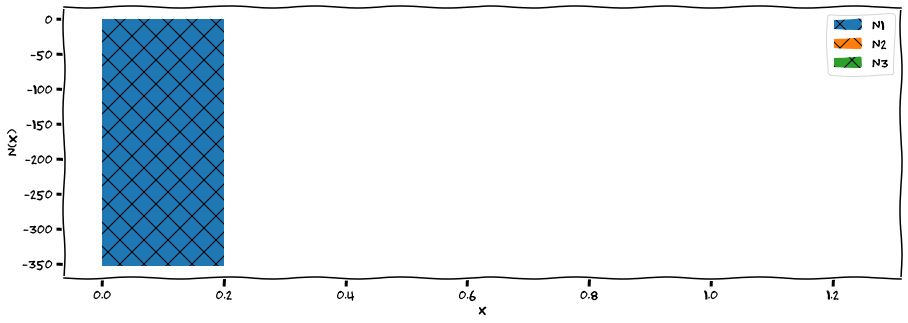

In [23]:
# prevedeme symboliku na numeriku
N1num = sp.lambdify(x, N1.subs({F1:F1num, alpha:alphanum}))
N2num = sp.lambdify(x, N2)
N3num = sp.lambdify(x, N3)
# vytvorime vektor souradnice x pro kresleni
x1 = np.linspace(1e-16, anum, 100)
x2 = np.linspace(anum, anum + bnum, 100)
x3 = np.linspace(anum+bnum, anum+bnum+cnum, 100)

#nastavime velikost obrazku
plt.figure(figsize=(15, 5))
# kreslime
plt.fill_between(x1, N1num(x1) * x1/x1, label="N1", hatch="X")
plt.fill_between(x2, N2num(x2) * x2/x2, label="N2", hatch="X")
plt.fill_between(x3, N3num(x3) * x3/x3, label="N3", hatch="X")
#pojmenujeme osy
plt.xlabel("x")
plt.ylabel("N(x)")
#vykreslime legendu
plt.legend()
# posleme obrazek ven
plt.show()

### Průběh tečné síly $Q$

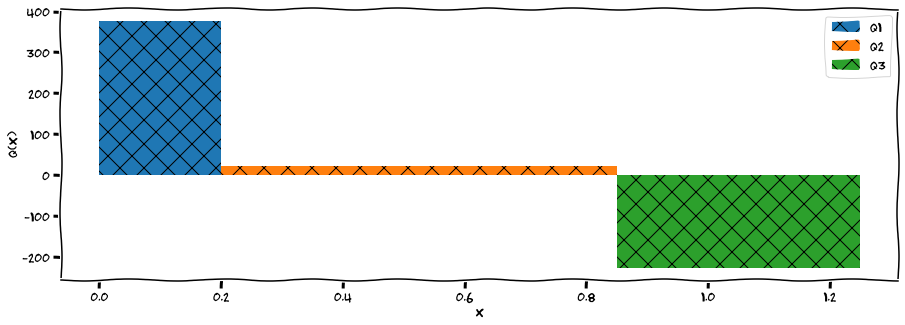

In [24]:
Q1num = sp.lambdify(x, Q1.subs({F1:F1num, alpha:alphanum, F2:F2num, a:anum, b:bnum, c:cnum}))
Q2num = sp.lambdify(x, Q2.subs({F1:F1num, alpha:alphanum, F2:F2num, a:anum, b:bnum, c:cnum}))
Q3num = sp.lambdify(x, Q3.subs({F1:F1num, alpha:alphanum, F2:F2num, a:anum, b:bnum, c:cnum}))
x1 = np.linspace(1e-16, anum, 100)
x2 = np.linspace(anum, anum + bnum, 100)
x3 = np.linspace(anum+bnum, anum+bnum+cnum, 100)

plt.figure(figsize=(15, 5))
plt.fill_between(x1, Q1num(x1), label="Q1", hatch="X")
plt.fill_between(x2, Q2num(x2), label="Q2", hatch="X")
plt.fill_between(x3, Q3num(x3), label="Q3", hatch="X")
plt.xlabel("x")
plt.ylabel("Q(x)")
plt.legend()
plt.show()

### Průběh ohybového momentu $M$

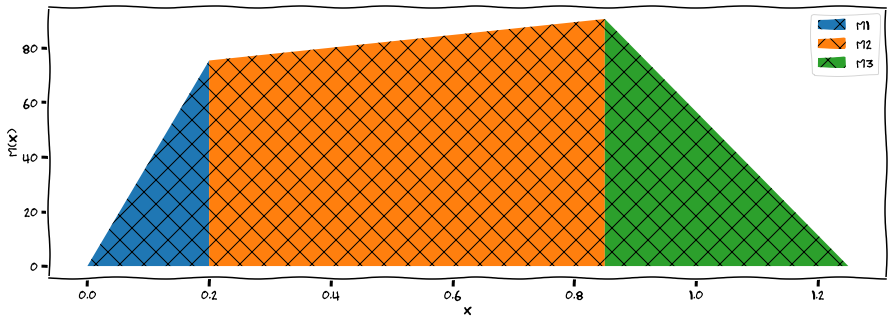

In [25]:
M1num = sp.lambdify(x, M1.subs({F1:F1num, alpha:alphanum, F2:F2num, a:anum, b:bnum, c:cnum}))
M2num = sp.lambdify(x, M2.subs({F1:F1num, alpha:alphanum, F2:F2num, a:anum, b:bnum, c:cnum}))
M3num = sp.lambdify(x, M3.subs({F1:F1num, alpha:alphanum, F2:F2num, a:anum, b:bnum, c:cnum}))
x1 = np.linspace(1e-16, anum, 100)
x2 = np.linspace(anum, anum + bnum, 100)
x3 = np.linspace(anum+bnum, anum+bnum+cnum, 100)

plt.figure(figsize=(15, 5))
plt.fill_between(x1, M1num(x1), label="M1", hatch="X")
plt.fill_between(x2, M2num(x2), label="M2", hatch="X")
plt.fill_between(x3, M3num(x3), label="M3", hatch="X")
plt.xlabel("x")
plt.ylabel("M(x)")
plt.legend()
plt.show()